<a href="https://colab.research.google.com/github/Joohhnnyyy/test-sets/blob/main/Final_model_weather(HistGradientBoostingClassifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df=pd.read_csv('weather prediction.csv')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           209 non-null    object 
 1   precipitation  209 non-null    float64
 2   temp_max       209 non-null    float64
 3   temp_min       209 non-null    float64
 4   wind           209 non-null    float64
 5   weather        209 non-null    object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [68]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,209.000000,209.000000,209.000000,209.000000
mean,3.207177,14.168900,6.326316,3.555981
std,5.444519,6.365331,4.538958,1.442779
min,0.000000,-1.100000,-3.300000,1.300000
25%,0.000000,8.900000,2.800000,2.500000
50%,0.300000,13.900000,6.100000,3.200000
75%,4.100000,18.900000,10.000000,4.300000
max,27.700000,28.300000,15.000000,8.200000


In [69]:
df.isna().sum()

,0
date,1252
precipitation,1252
temp_max,1252
temp_min,1252
wind,1252
weather,1252


In [70]:
df.duplicated().sum()

1251

In [71]:
df[df['temp_min']==min(df.temp_min)]

,date,precipitation,temp_max,temp_min,wind,weather
14,15/01/12,5.3,1.1,-3.3,3.2,snow


In [72]:
df[df['temp_max']==max(df.temp_max)]

,date,precipitation,temp_max,temp_min,wind,weather
189,08/07/12,0.0,28.3,14.4,2.8,rain


<Axes: xlabel='temp_max', ylabel='Count'>

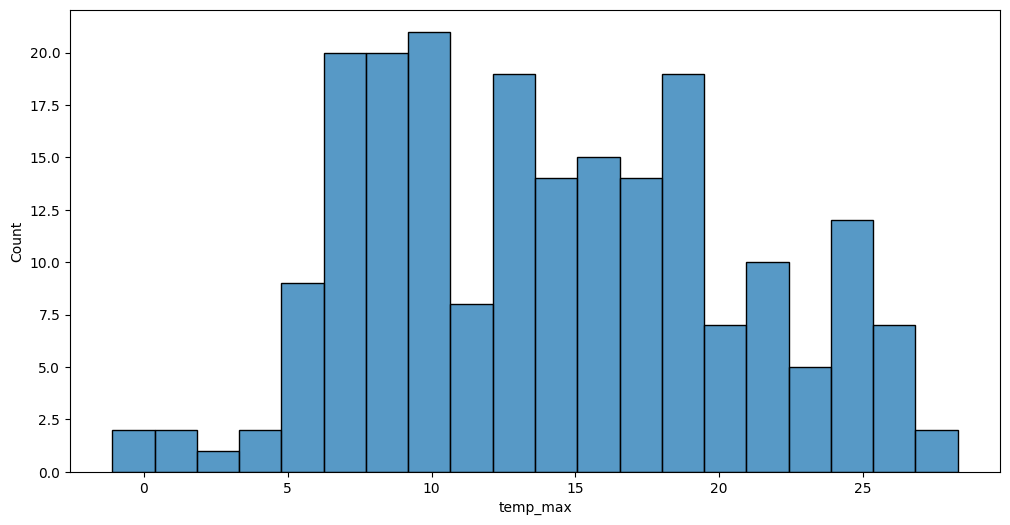

In [73]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x=df.temp_max,bins=20)

<Axes: xlabel='temp_min', ylabel='Count'>

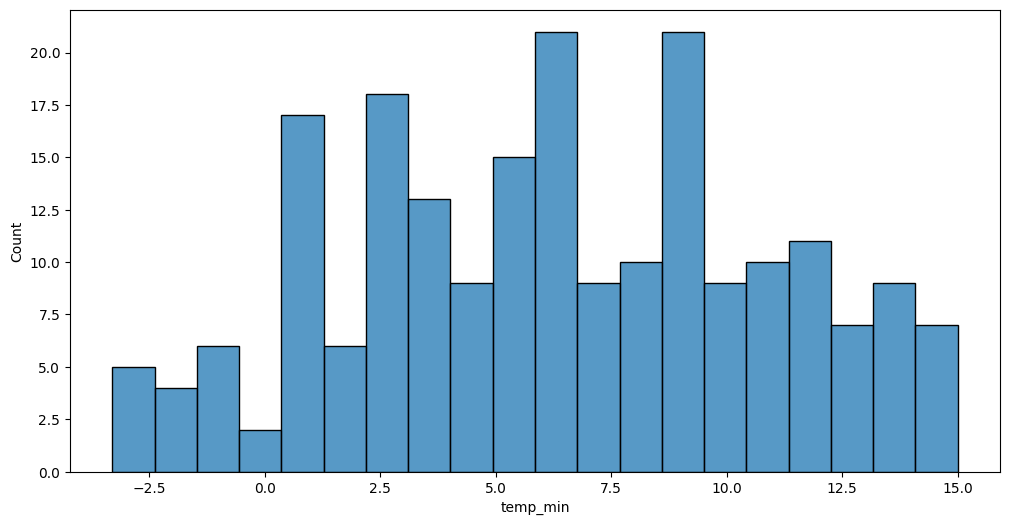

In [74]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x=df.temp_min,bins=20)

In [75]:
df.loc[:,['date','temp_max']]
df['date'] = pd.to_datetime(df['date'])

<ipython-input-75-a18818c97e7a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [76]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Max temperature in each month in each year

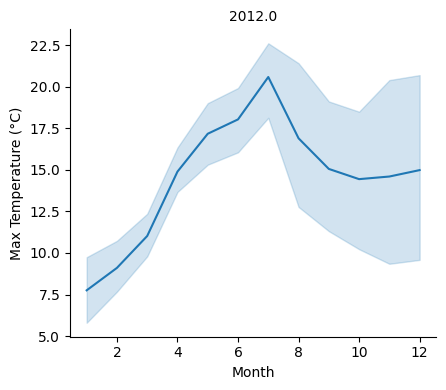

In [77]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_max')
g.set_axis_labels('Month', 'Max Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

# Min temperature in each month in each year

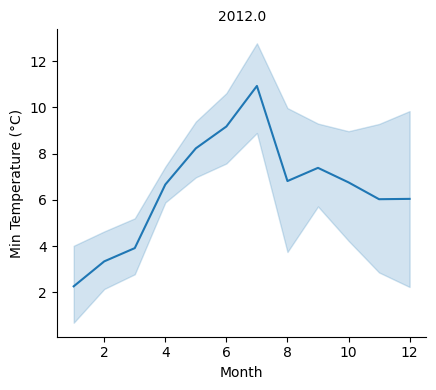

In [78]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_min')
g.set_axis_labels('Month', 'Min Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

# Precipitation in each month in each year

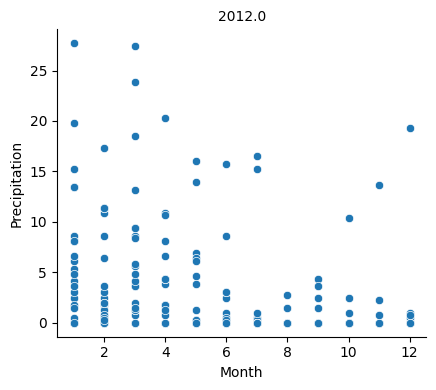

In [79]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.scatterplot, 'month', 'precipitation')
g.set_axis_labels('Month', 'Precipitation')
g.set_titles(col_template="{col_name}")
plt.show()

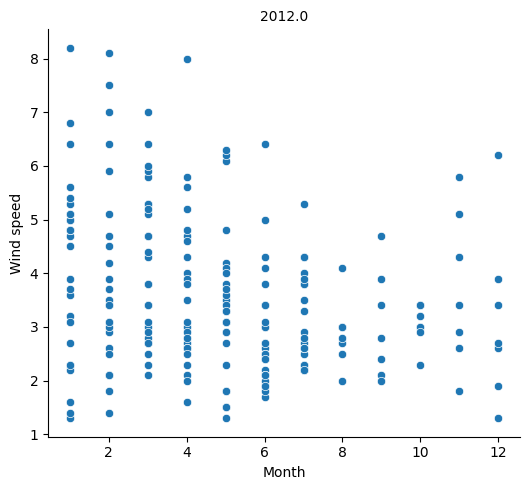

In [80]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=5)
g.map(sns.scatterplot, 'month', 'wind')
g.set_axis_labels('Month', 'Wind speed')
g.set_titles(col_template="{col_name}")
plt.show()

In [81]:
df.weather.value_counts()

,count
weather,
rain,120
sun,59
snow,16
drizzle,13
fog,1


<Axes: xlabel='weather', ylabel='count'>

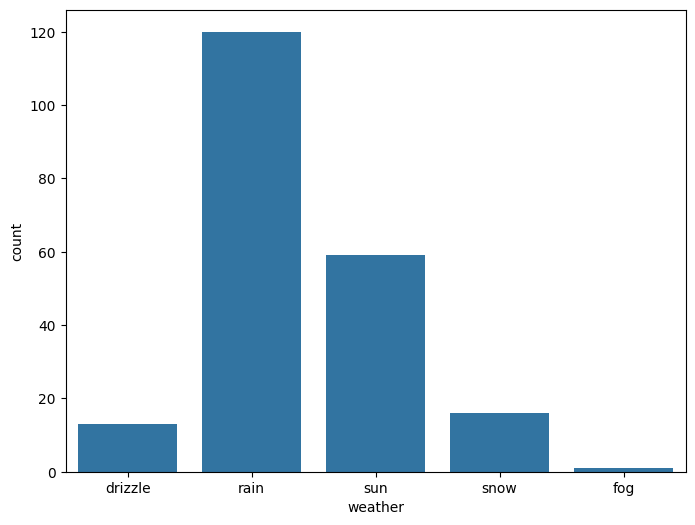

In [82]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x=df.weather)

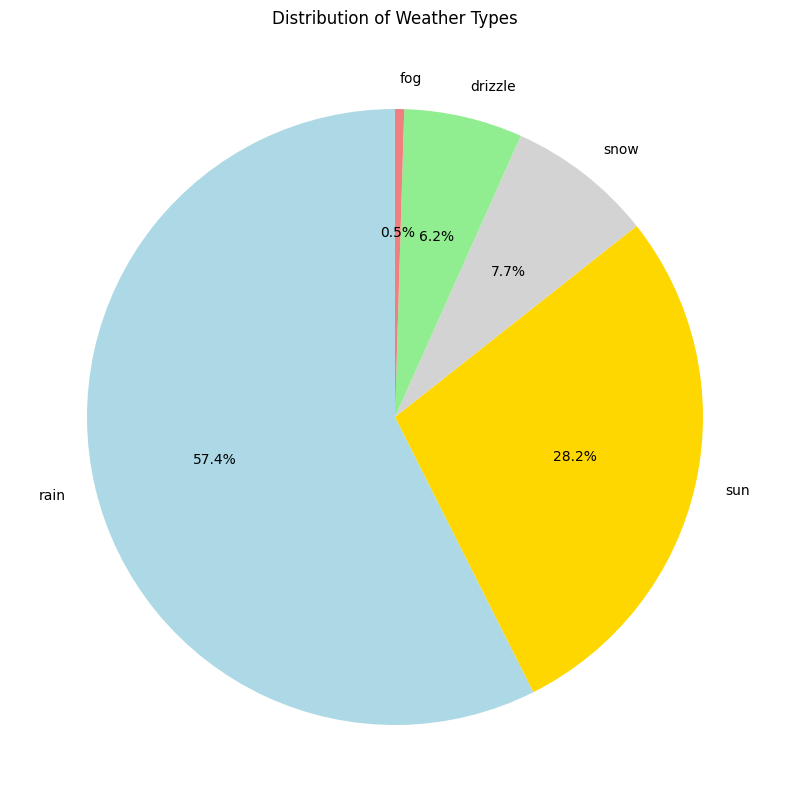

In [83]:
x=df.weather.value_counts()
plt.figure(figsize=(12, 10))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'gold', 'lightgray', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Weather Types')
plt.show()

In [84]:
df.drop('month',axis=1,inplace=True)
df.drop('year',axis=1,inplace=True)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           209 non-null    datetime64[ns]
 1   precipitation  209 non-null    float64       
 2   temp_max       209 non-null    float64       
 3   temp_min       209 non-null    float64       
 4   wind           209 non-null    float64       
 5   weather        209 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('weather prediction.csv')
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.drop(['month', 'year', 'date'], axis=1, inplace=True)

le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather'])

x = df[['temp_min', 'temp_max', 'precipitation', 'wind']]
y = df['weather']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf_model = HistGradientBoostingClassifier()
clf_model.fit(X_train, y_train)

y_pred = clf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.95
Confusion Matrix:
[[  0   0   0   0   2   0]
 [  0   0   1   0   0   0]
 [  0   0  16   1   2   0]
 [  0   0   5   1   0   0]
 [  0   0   3   0   5   0]
 [  0   0   0   0   0 257]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       1.00      0.00      0.00         1
           2       0.64      0.84      0.73        19
           3       0.50      0.17      0.25         6
           4       0.56      0.62      0.59         8
           5       1.00      1.00      1.00       257

    accuracy                           0.95       293
   macro avg       0.78      0.44      0.43       293
weighted avg       0.95      0.95      0.95       293



In [87]:

print(f"Classes: {le.classes_}")
print(f"Encoded values: {le.transform(le.classes_)}")

Classes: ['drizzle' 'fog' 'rain' 'snow' 'sun' nan]
Encoded values: [0 1 2 3 4 5]


#OUTPUT

In [88]:
def predict_weather(temp_min, temp_max, precipitation, wind):
  """Predicts the weather based on input features."""
  input_data = pd.DataFrame([[temp_min, temp_max, precipitation, wind]],
                             columns=['temp_min', 'temp_max', 'precipitation', 'wind'])
  prediction = clf_model.predict(input_data)[0]
  return prediction

precipitation = float(input("Enter precipitation: "))
temp_max = float(input("Enter maximum temperature: "))
temp_min = float(input("Enter minimum temperature: "))
wind = float(input("Enter wind speed: "))


predicted_weather = predict_weather(temp_min, temp_max, precipitation, wind)
predicted_weather_label = le.inverse_transform([predicted_weather])

print(f"Predicted weather: {predicted_weather_label[0]}")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Enter precipitation: 0
Enter maximum temperature: 22.8
Enter minimum temperature: 8.9
Enter wind speed: 1.8
Predicted weather: sun
Accuracy: 0.95
